# <center>🔍 RELATÓRIO DE TESTE A/B 🎯</center>

<hr>

#### <h4> <strong> Seleção das Amostras 🎯 </strong> </h4>

<p>Estamos conduzindo um teste A/B para analisar a interface do aplicativo <strong>Hestia</strong>. Para registrar o tempo de interação de cada usuário, utilizamos o <em>Microsoft Forms</em>.</p>

<p>A fim de garantir a imparcialidade, asseguramos que os participantes realizassem o teste A/B sem qualquer orientação ou assistência da nossa parte, evitando, assim, dados tendenciosos.</p>

<br>

<p>A pesquisa foi direcionada ao nosso público-alvo: indivíduos que estão ou já estiveram matriculados em uma universidade.</p>

<br>

<p>Cada membro da equipe de dados entrevistou <strong>30 usuários</strong>, um número crucial para assegurar a robustez estatística dos resultados.</p>

<br>

<hr>

#### <h4> <strong> Justificativa da Melhoria 🔧 </strong> </h4>

<p>Nosso objetivo é avaliar se a Interface B proporciona uma interação mais ágil em comparação à Interface A ⚡.</p>

Temos dois fluxos principais:

**Fluxo 1:**
- Curtir a primeira casa
- Rejeitar a segunda
- Solicitar mais informações sobre a terceira
- Entrar em contato com o anunciante

**Fluxo 2:**
- Cadastrar como universitário com filtros "Gatos ; cachorro", "Não Bebo"
- Alterar filtros para "Cachorro", "Socialmente"
- Modificar e-mail

<p>A distinção entre eles é a seguinte:</p>

<strong> Interface A: </strong> No primeiro fluxo, utilizamos um sistema de match/slash para listar as moradias.

<strong> Interface B: </strong> Adotamos um método clássico de listagem de moradias no primeiro fluxo e reformulamos consideravelmente a disposição dos botões no segundo fluxo.

<hr>

<h4> Hípoteses </h4>
<p>H0: μB ≥ μA</p>
<p>H1: μB < μA</p>

<hr>

#### Importando bibliotecas

In [18]:
import numpy as np
import pandas as pd
import pingouin as pg
import scipy.stats as stats
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns

#### Definindo a base de dados com o resultado dos testes

In [3]:
dataset = pd.read_excel('./teste_ab_hestia.xlsx')

dataset_a = dataset.loc[dataset['Interface testada'] == 'Interface A']
dataset_b = dataset.loc[dataset['Interface testada'] == 'Interface B']

dataset_a = dataset_a.iloc[:30, :]

dataset_testeab = pd.DataFrame({
    "Teste A": list(dataset_a['Tempo total do fluxo']),
    "Teste B": list(dataset_b['Tempo total do fluxo'])
})

display(dataset_testeab.head(5))

,Teste A,Teste B
0,183,276
1,107,293
2,161,192
3,288,206
4,203,320


#### Calculando medidas

In [7]:
# Média de segundos de ambos testes
media_a = np.mean(dataset_testeab['Teste A'])
media_b = np.mean(dataset_testeab['Teste B'])

print(f"Média - Teste A: {media_a}")
print(f"Média - Teste B: {media_b}")


Média - Teste A: 215.2
Média - Teste B: 236.4


In [13]:
t, p_valor = ttest_ind(dataset_testeab['Teste B'], dataset_testeab['Teste A'], alternative = 'less')
print(f"T: {t}")
print(f"P-valor: {p_valor}")

T: 1.276760182693
P-valor: 0.8966124374810867


#### Calculando Grau de Liberdade

In [20]:
ALPHA = 0.05
T_CONSERVADOR = 1.684
T_RISCO = 1.671

In [9]:
result = pg.ttest(dataset_testeab['Teste B'], dataset_testeab['Teste A'], alternative='less', correction = "auto", paired=False)

print("Grau de Liberdade: ", result[['dof']])

Grau de Liberdade:          dof
T-test   58


In [ ]:
mu = 0
sigma = 1
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)

y = stats.norm.pdf(x, mu, sigma)

#### Grau de Liberdade - Conservador
O grau de liberdade foi calculado em 58. Para fins de análise, optamos por arredondar esse valor para baixo, utilizando o grau de liberdade 40 na tabela do T-Student. Essa abordagem reflete uma postura mais conservadora, evitando riscos desnecessários.

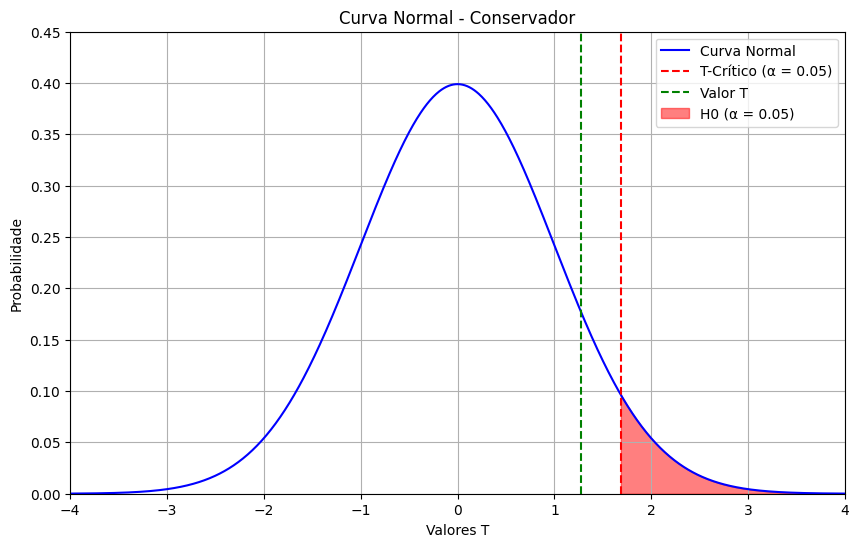

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Curva Normal', color='blue')
plt.axvline(T_CONSERVADOR, color='red', linestyle='--', label='T-Crítico (α = 0.05)')
plt.axvline(t, color='green', linestyle='--', label='Valor T')
plt.fill_between(x, y, where=(x >= T_CONSERVADOR), color='red', alpha=0.5, label='H0 (α = 0.05)')

plt.title('Curva Normal - Conservador')
plt.xlabel('Valores T')
plt.ylabel('Probabilidade')
plt.legend()
plt.grid()
plt.xlim(-4, 4)
plt.ylim(0, 0.45)

plt.show()  

#### Grau de Liberdade - Risco
Aqui, a estratégia é ser arriscado. Vamos arredondar o grau de liberdade para cima, decidindo por um valor de 60. Essa escolha nos permitirá explorar se existe uma diferença significativa, mesmo que isso signifique correr um pouco mais de risco.





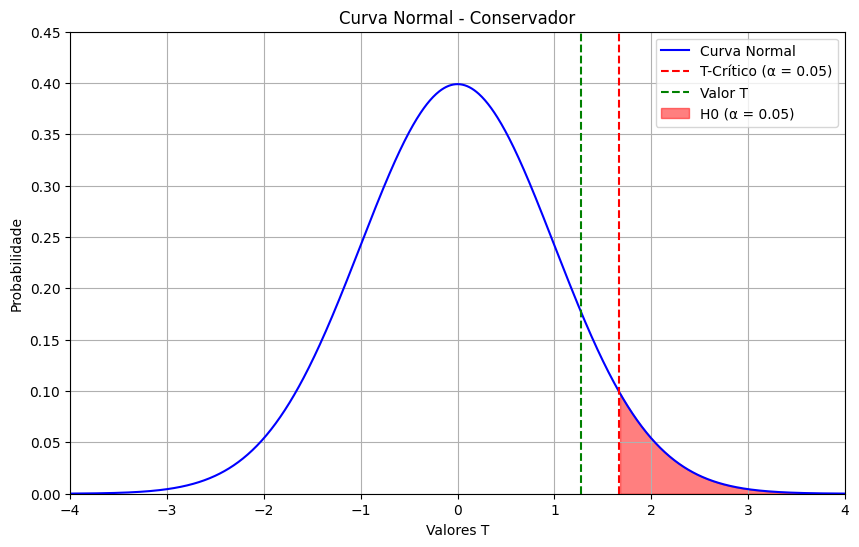

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Curva Normal', color='blue')
plt.axvline(T_RISCO, color='red', linestyle='--', label='T-Crítico (α = 0.05)')
plt.axvline(t, color='green', linestyle='--', label='Valor T')
plt.fill_between(x, y, where=(x >= T_RISCO), color='red', alpha=0.5, label='H0 (α = 0.05)')

plt.title('Curva Normal - Conservador')
plt.xlabel('Valores T')
plt.ylabel('Probabilidade')
plt.legend()
plt.grid()
plt.xlim(-4, 4)
plt.ylim(0, 0.45)

plt.show()

### Resultado

In [29]:
if p_valor < ALPHA:
    print("A interface B é mais rápida que a interface A - Rejeitamos o H0")
else:
    print("A interface A é mais rápida que a interface B - Aceitamos H0")

A interface A é mais rápida que a interface B - Aceitamos H0
